##*Sign language is a visual way of communicating through hand signals, gestures, facial expressions, and body language.Sign language is the primary form of communication for the deaf and hard of hearing community, but sign language can be useful for other groups of people as well. People with disabilities, including autism, apraxia of speech, cerebral palsy, and Down syndrome, may also find sign language beneficial for communication.The dataset I’ll be using here is a montage panel of cropped images from various users and backgrounds for American Sign Language letters.*

##*This dataset was inspired by Fashion-MNIST and Sreehari’s machine learning pipeline for gestures. Now let’s start with the task of classifying sign language by importing the necessary Python libraries and the dataset:*

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
data_train=pd.read_csv('/content/sign_mnist_test.csv')
data_test=pd.read_csv('/content/sign_mnist_train.csv')

*Now I will move to the task of data preparation for our machine learning model. First I will prepare the data then I will split the data into training and test sets:*

In [1]:
 #In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)

In [5]:
training_images=data_train.iloc[:,1:].values
training_labels=data_train.iloc[:,0].values
print(training_images,training_labels)

[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]] [ 6  5 10 ...  2  4  2]


In [6]:
testing_images=data_test.iloc[:,1:].values
testing_labels=data_test.iloc[:,0].values

In [7]:
testing_images.shape

(27455, 784)

In [8]:
#reshaping the input train and test images:
training_images=training_images.reshape(-1,28,28,1)

In [9]:
testing_images = testing_images.reshape(-1,28,28,1)

In [11]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(7172, 28, 28, 1)
(7172,)
(27455, 28, 28, 1)
(27455,)


##**Now let’s have a look at the first 10 images in the dataset:**

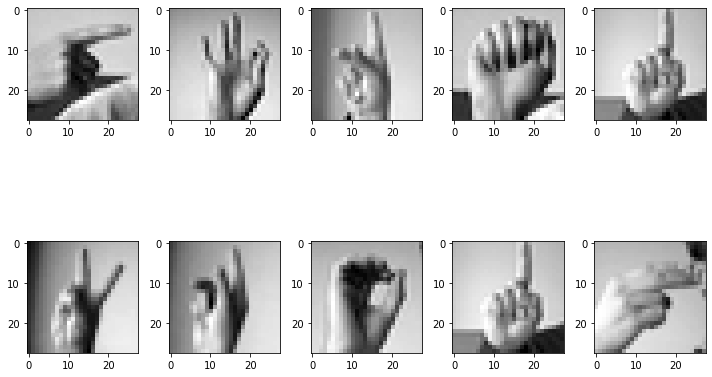

In [14]:
#plotting the first 10 images:
fig,ax=plt.subplots(2,5)
fig.set_size_inches(10,10)
k=0
for i in range(2):
  for j in range(5):
    ax[i,j].imshow(training_images[k].reshape(28,28), cmap='gray')
    k+=1
  plt.tight_layout()

In [15]:
# Create an ImageDatagenerator and do Image Augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    

In [18]:
# Keep These
print(training_images.shape)
print(testing_images.shape)

(7172, 28, 28, 1)
(27455, 28, 28, 1)


##**Training Neural Network**
Now, I will train a Neural network model for the task of Sign Language classification with Python:

In [24]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')]
)

In [25]:
#Compile the model:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
224/224 [==============================] - 20s 18ms/step - loss: 3.0905 - accuracy: 0.0929 - val_loss: 2.9550 - val_accuracy: 0.0948
Epoch 2/10
224/224 [==============================] - 4s 17ms/step - loss: 2.7864 - accuracy: 0.1719 - val_loss: 2.3711 - val_accuracy: 0.2719
Epoch 3/10
224/224 [==============================] - 4s 17ms/step - loss: 2.3990 - accuracy: 0.2610 - val_loss: 2.0867 - val_accuracy: 0.3701
Epoch 4/10
224/224 [==============================] - 4s 17ms/step - loss: 2.0854 - accuracy: 0.3443 - val_loss: 1.8690 - val_accuracy: 0.4259
Epoch 5/10
224/224 [==============================] - 4s 17ms/step - loss: 1.8902 - accuracy: 0.3972 - val_loss: 1.7975 - val_accuracy: 0.4501
Epoch 6/10
224/224 [==============================] - 4s 16ms/step - loss: 1.7430 - accuracy: 0.4339 - val_loss: 1.4615 - val_accuracy: 0.5194
Epoch 7/10
224/224 [==============================] - 4s 17ms/step - loss: 1.5809 - accuracy: 0.4895 - val_loss: 1.4171 - val_accuracy: 0.546

[236.52316284179688, 0.41551628708839417]

In [28]:
model.evaluate(testing_images, testing_labels, verbose=0)

[236.52316284179688, 0.41551628708839417]

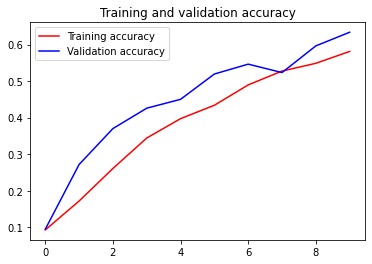

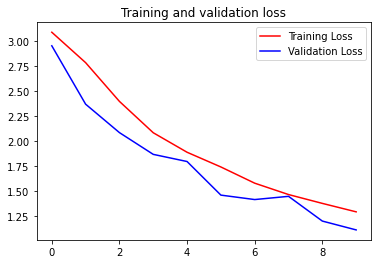

In [29]:
#Now let’s have a look at the accuracy and validation score of the model:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [30]:
#Now let’s make a classification report and test our model:

In [38]:
# predictions
#predictions = model.predict(testing_images)
predictions=np.argmax(model.predict(testing_images), axis=1)

In [39]:
predictions

array([23, 23, 14, ..., 18, 20, 23])

              precision    recall  f1-score   support

     Class 0       0.49      0.51      0.50      1126
     Class 1       0.91      0.63      0.74      1010
     Class 2       0.64      0.15      0.24      1144
     Class 3       1.00      0.00      0.01      1196
     Class 4       0.39      0.45      0.42       957
     Class 5       0.97      0.54      0.70      1204
     Class 6       0.60      0.08      0.14      1090
     Class 7       0.67      0.62      0.64      1013
     Class 8       0.29      0.64      0.40      1162
    Class 10       0.93      0.05      0.09      1114
    Class 11       0.94      0.17      0.28      1241
    Class 12       0.10      0.16      0.12      1055
    Class 13       0.21      0.89      0.33      1151
    Class 14       0.37      0.97      0.53      1196
    Class 15       1.00      0.03      0.06      1088
    Class 16       0.72      0.76      0.74      1279
    Class 17       0.32      0.32      0.32      1294
    Class 18       0.33    

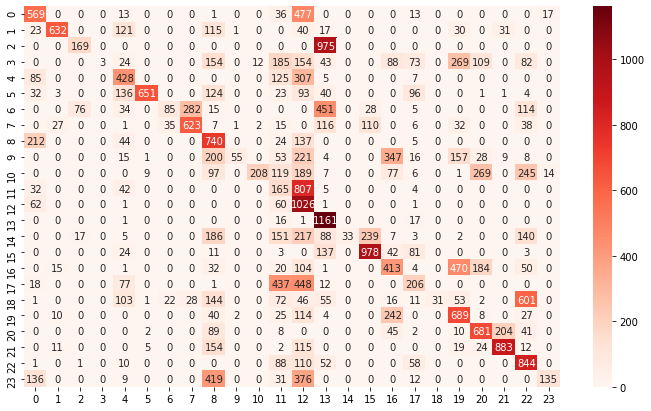

In [45]:
# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')